In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_Users = pd.read_xml(r"D:/mada/programming/Datasets/Stack over flaw/Users.xml", parser="etree")

In [3]:
df_Users

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
0,-1,1,2010-07-19T06:55:26.860,Community,2010-07-19T06:55:26.860,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",3131,17823,9720,-1.0
1,2,101,2010-07-19T14:01:36.697,Geoff Dalgas,2019-02-07T22:01:05.890,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,49,3,0,2.0
2,3,101,2010-07-19T15:34:50.507,Jarrod Dixon,2019-02-07T16:22:42.717,http://jarroddixon.com,"Johnson City, TN, USA","<p>Former <a href=""http://blog.stackoverflow.c...",50,23,0,3.0
3,4,101,2010-07-19T19:03:27.400,Emmett,2016-11-24T19:37:25.313,http://minesweeperonline.com,"San Francisco, CA","<p>co-founder of <a href=""https://airtable.com...",24,0,0,1998.0
4,5,12151,2010-07-19T19:03:57.227,Shane,2022-12-07T19:30:33.150,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,2101,684,5,54503.0
...,...,...,...,...,...,...,...,...,...,...,...,...
333779,395857,1,2023-09-03T03:39:24.010,Vivek Lele,2023-09-03T03:39:24.010,None,None,None,0,0,0,9603757.0
333780,395858,1,2023-09-03T03:42:28.553,strategibola,2023-09-03T03:42:28.553,https://strategibola.com,None,"<p><a href=""https://strategibola.com/"" rel=""no...",0,0,0,29354848.0
333781,395859,1,2023-09-03T04:07:05.447,Niño Hernández Jaquelin,2023-09-03T04:07:05.447,None,None,None,0,0,0,29354942.0
333782,395860,1,2023-09-03T04:24:13.277,xesrc,2023-09-03T04:24:13.277,None,None,None,0,0,0,24560896.0


In [4]:
df_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333784 entries, 0 to 333783
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              333784 non-null  int64  
 1   Reputation      333784 non-null  int64  
 2   CreationDate    333784 non-null  object 
 3   DisplayName     333761 non-null  object 
 4   LastAccessDate  333784 non-null  object 
 5   WebsiteUrl      33070 non-null   object 
 6   Location        86458 non-null   object 
 7   AboutMe         60608 non-null   object 
 8   Views           333784 non-null  int64  
 9   UpVotes         333784 non-null  int64  
 10  DownVotes       333784 non-null  int64  
 11  AccountId       333768 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 30.6+ MB


In [6]:
df_Users.isnull().sum()

Id                     0
Reputation             0
CreationDate           0
DisplayName           23
LastAccessDate         0
WebsiteUrl        300714
Location          247326
AboutMe           273176
Views                  0
UpVotes                0
DownVotes              0
AccountId             16
dtype: int64

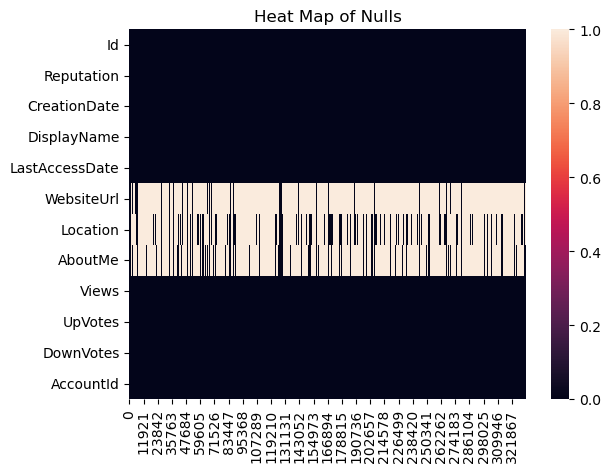

In [8]:
sns.heatmap(df_Users.isnull().T, cbar=True)
plt.title('Heat Map of Nulls')
plt.show()

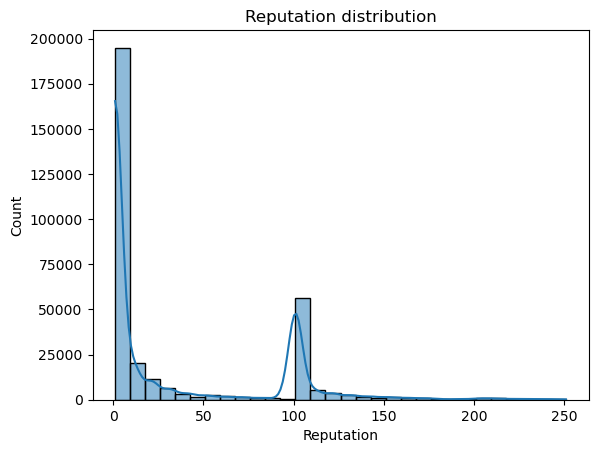

In [20]:
Q1 = df_Users['Reputation'].quantile(0.25)
Q3 = df_Users['Reputation'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_data = df_Users[(df_Users['Reputation'] >= lower_bound) & (df_Users['Reputation'] <= upper_bound)]
sns.histplot(data=filtered_data, x='Reputation', kde=True, bins = 30)
#plt.xlim(left=-20, right=40)
plt.title('Reputation distribution')
plt.xlabel('Reputation')
plt.show()

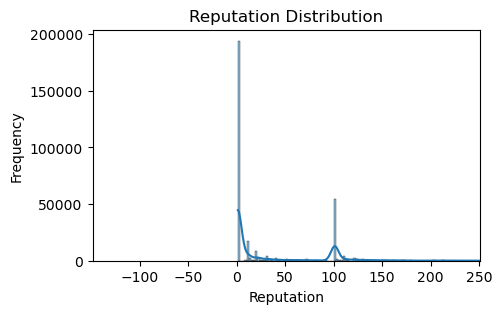

In [18]:
Q1 = df_Users['Reputation'].quantile(0.25)
Q3 = df_Users['Reputation'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_data = df_Users[(df_Users['Reputation'] >= lower_bound) & (df_Users['Reputation'] <= upper_bound)]

# Create the plot with adjusted figure size
plt.figure(figsize=(5, 3))  # Reduce width and height

sns.histplot(data=filtered_data, x='Reputation', kde=True)

# Adjust axis limits
plt.xlim(lower_bound, upper_bound)  # Shrink x-axis
plt.ylim(0, None)  # Adjust y-axis if necessary

plt.title('Reputation Distribution')
plt.xlabel('Reputation')
plt.ylabel('Frequency')
plt.show()